# Conjunto de dados flor Iris 

![flor-iris](https://user-images.githubusercontent.com/98621150/159141305-29110305-116f-4862-8348-25ca3da179b8.png)

* O Iris dataset é um conjunto de dados com informações sobre três espécies de flores de íris: íris setosa, íris versicolor e íris virginica. Ele foi criado por um biólogo britânico chamado Ronald Fisher em 1936 como parte de seus estudos sobre análise discriminante. 

* O conjunto de dados inclui medidas de comprimento e largura da sépala e da pétala de cada flor, além da espécie a qual pertence. Ele é amplamente utilizado como um exemplo para treinar algoritmos de aprendizado de máquina e para avaliar a precisão de diferentes técnicas de classificação.





## Dicionário de variáveis


* `Id` - Número único para cada linha
* `SepalLengthCm` - Comprimento da sépala (em cm)
* `SepalWidthCm` - Largura da sépala (em cm)
* `PetalLengthCm` - Comprimento da pétala (em cm)
* `PetalWidthCm` - Largura da pétala (em cm)
* `Species` - Nome da espécie


## Importando os dados

* Para a construção do modelo preditivo foi usado o banco de dados Iris, disponibilizado no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/iris) e também no [Kaggle](https://www.kaggle.com/uciml/iris). 

In [1]:
pip install -q scikeras

In [2]:
# importando os pacotes necessários
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from scikeras.wrappers import KerasClassifier  

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
# importando o dataset em csv 
iris_df = pd.read_csv('Iris.csv')

## Análise exploratória dos dados

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# exibindo as 5 primeiras linhas
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [5]:
print('DIMENSÕES DO DATAFRAME:')
print(f'Linhas:\t\t{iris_df.shape[0]}')
print(f'Colunas:\t{iris_df.shape[1]}')

DIMENSÕES DO DATAFRAME:
Linhas:		150
Colunas:	6


In [6]:
display(iris_df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object



Com essa análise inicial, podemos fazer algumas observações importantes:

* A coluna `Species` é a nossa variável alvo. 
    * Iris-setosa
    * Iris-versicolor
    * Iris-virginica
* Nossa variável alvo é do tipo `object`, sendo assim, teremos que converter para um valor numérico antes de montar a máquina preditiva.
* Temos que eliminar a coluna `Id`, já que ela é inútil para o nosso estudo.

É sempre interessante ver um resumo estatístico das variáveis numéricas através do `describe`.

In [7]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


A qualidade das máquinas preditivas dependerá diretamente da qualidade dos dados que estamos fornecendo a ela, então faremos 3 coisas no nosso dataset:

* verificar a presença de valores duplicados
* verificar a presença valores missing (valores ausentes)
* excluir a coluna `Id`

In [8]:
# Verificando se há linhas duplicadas
iris_df.duplicated().sum()

0

In [9]:
# Verificando se há valores Missing (valores ausentes) das plantas
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# Eliminando a coluna id 
iris_df = iris_df.drop('Id', axis=1)

Agora, Irei criar um Gráfico de Barras para  mostrar a frequência da variável `Species` 

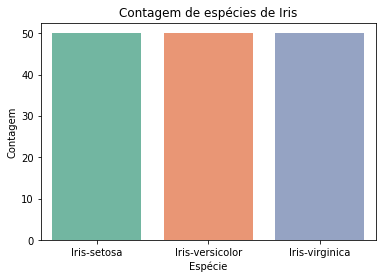

In [11]:
# crie um gráfico de contagem de espécies usando o seaborn
sns.countplot(data=iris_df, x='Species', palette = "Set2")

# adicione um título ao gráfico
plt.title('Contagem de espécies de Iris')

# adicione um rótulo ao eixo x
plt.xlabel('Espécie')

# adicione um rótulo ao eixo y
plt.ylabel("Contagem")

# exiba o gráfico
plt.show()

Vamos plotar um `heatmap`para ver a força da correlação entre as variáveis.

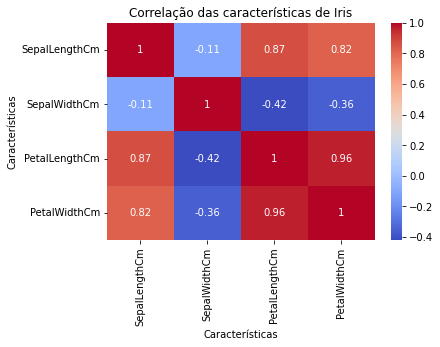

In [12]:
# crie um gráfico de calor usando o seaborn
fig, ax = plt.subplots()
sns.heatmap(data=iris_df.corr(), annot=True, cmap='coolwarm', ax=ax)

# adicione um título ao gráfico
plt.title('Correlação das características de Iris')

# adicione rótulos aos eixos x e y
plt.xlabel('Características')
plt.ylabel('Características')

# exiba o gráfico
plt.show()

## Pré-Processamento dos dados

Nessa etapa, trocaremos o tipo do atributo `Species` por um tipo numérico para que nosso algoritmo funcione corretamente

In [13]:
# crie um dicionário que mapeia as strings das espécies para valores numéricos
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# use o método map para substituir os valores das espécies na coluna 'Species' pelos valores numéricos correspondentes
iris_df['Species'] = iris_df['Species'].map(species_map)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


É prudente analisar por meio da função `dtypes` para ter certeza que não temos mais valores do tipo `string`

In [14]:
# Verificando o tipo das variáveis
iris_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

## Preparação dos dados

In [15]:
# separarando as variáveis independentes da variável alvo
X = iris_df.iloc[:,0:4]
y = iris_df.Species

## Modelo de Redes Neurais (Keras)

In [16]:
# Transformando a variável y em uma matriz binária
y_transformado = np_utils.to_categorical(y)

In [17]:
def Keras_MLP():
  # configurando a rede neural
  model = Sequential()
  model.add(Dense(8, input_dim=4, activation='relu'))
  # adicione uma camada de dropout para evitar overfitting
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))
  
  # compilando o modelo
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

	# 4 entradas -> [8 neurônios na camada oculta] -> 3 saídas

## Avaliando o modelo com validação cruzada k-Fold

In [21]:
classificador = KerasClassifier(model=Keras_MLP, epochs=200, batch_size=5, verbose=0)

In [22]:
kfold = KFold(n_splits=10, shuffle=True)

In [23]:
resultado = cross_val_score(classificador, X, y_transformado, cv=kfold)

In [24]:
# Calcula a média e o desvio padrão do resultado
mean = resultado.mean()
std = resultado.std()

In [26]:
# Imprime os resultados
mean, std

(0.96, 0.044221663871405324)